In [4]:
import sys
sys.path.append('../')

import tquant as tq
from engine.globalconfig import GlobalConfig
from engine.loader.curveload import MarketDataLoader

from datetime import date
import matplotlib.pyplot as plt
# from utilities.daycounter import DayCounter, DayCounterConvention

In [5]:
day_counter = tq.DayCounter(tq.DayCounterConvention.Actual360)
calendar = tq.TARGET()
tq.Settings.evaluation_date = date(2012,12,11)

# Discount Curve

### tQuant

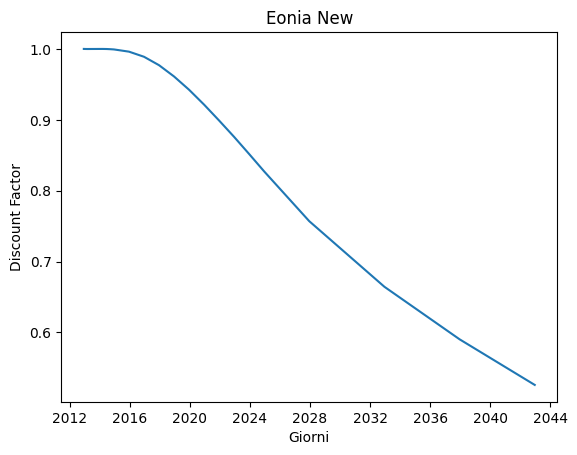

In [6]:
helpers = [
            tq.DepositRateHelper(rate/100.0,
                                1, tq.TimeUnit.Days, calendar, tq.BusinessDayConvention.Following, settlement_days,day_counter)
                                for rate, settlement_days in [(0.04, 0), (0.04, 1), (0.04, 2)]
            ]
helpers += [
            tq.OISRateHelper(rate/100.0, period, timeunit, calendar, tq.BusinessDayConvention.Following,1,tq.TimeUnit.Years, settlement_days= 2, day_counter=day_counter, fixing_days= 2)
            for rate, period, timeunit in [(0.070, 1, tq.TimeUnit.Weeks), (0.069, 2, tq.TimeUnit.Weeks),
                                            (0.078, 3, tq.TimeUnit.Weeks), (0.074, 1, tq.TimeUnit.Months)]
                            ]

helpers += [
                tq.DatedOISRateHelper(rate/100.0, start_date, end_date, calendar,tq.BusinessDayConvention.Following,1,tq.TimeUnit.Years, day_counter=day_counter, fixing_days= 2)
                for rate, start_date, end_date in [
                ( 0.046, date(2013,1,16), date(2013,2,13)),
                ( 0.016, date(2013,2,13), date(2013,3,13)),
                (-0.007, date(2013,3,13), date(2013,4,10)),
                (-0.013, date(2013,4,10), date(2013,5,8)),
                (-0.014, date(2013,5,8), date(2013,6,12))]
                ]
helpers += [
                tq.OISRateHelper(rate/100.0, period, timeunit, calendar, tq.BusinessDayConvention.Following,1,tq.TimeUnit.Years, settlement_days= 2, day_counter=day_counter, fixing_days= 2)
                for rate, period, timeunit in [(0.002, 15,tq.TimeUnit.Months), (0.008, 18,tq.TimeUnit.Months),
                (0.021, 21,tq.TimeUnit.Months), (0.036, 2,tq.TimeUnit.Years),
                (0.127, 3,tq.TimeUnit.Years), (0.274, 4,tq.TimeUnit.Years),
                (0.456, 5,tq.TimeUnit.Years), (0.647, 6,tq.TimeUnit.Years),
                (0.827, 7,tq.TimeUnit.Years), (0.996, 8,tq.TimeUnit.Years),
                (1.147, 9,tq.TimeUnit.Years), (1.280, 10,tq.TimeUnit.Years),
                (1.404, 11,tq.TimeUnit.Years), (1.516, 12,tq.TimeUnit.Years),
                (1.764, 15,tq.TimeUnit.Years), (1.939, 20,tq.TimeUnit.Years),
                (2.003, 25,tq.TimeUnit.Years), (2.038, 30,tq.TimeUnit.Years)]
                ]

disc_curve = tq.YieldCurve(calendar, helpers= helpers, interpolation = tq.InterpolationType.Cubic)

A = disc_curve.dfs
B = disc_curve.pillars
C = disc_curve.T1

# Creazione del plot
plt.plot(B, A)

plt.xlabel('Giorni')
plt.ylabel('Discount Factor')
plt.title('Eonia New')

# Visualizzazione del plot
plt.show()

### QuantLib

In [10]:
import QuantLib as ql

#Bechmark con la Quantlib
today = ql.Date(11, ql.December, 2012)
ql.Settings.instance().evaluationDate = today


DepositRateHelper

In [22]:
rate = 0.04
fixing_days = 0
deposit_helper = ql.DepositRateHelper(ql.QuoteHandle(ql.SimpleQuote(rate/100)), # quote, rate
                                    ql.Period(1,ql.Days), # tenor
                                    fixing_days, # fixing days??
                                    ql.TARGET(), # calendario
                                    ql.Following, # bd convention
                                    False, # fine mese
                                    ql.Actual360()) # daycounter

In [ ]:
deposit_helper

calcoli

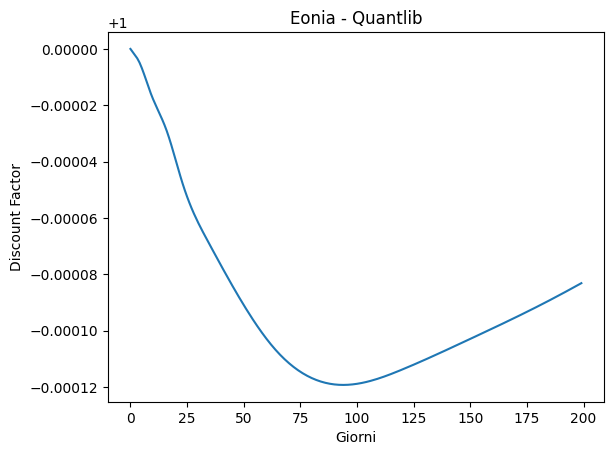

In [7]:
helpers = [
ql.DepositRateHelper(ql.QuoteHandle(ql.SimpleQuote(rate/100)),
ql.Period(1,ql.Days), fixingDays,
ql.TARGET(), ql.Following,
False, ql.Actual360())
for rate, fixingDays in [(0.04, 0), (0.04, 1), (0.04, 2)]
]


eonia = ql.Eonia() #Eonia che daycounter ha?

helpers += [
ql.OISRateHelper(2, ql.Period(*tenor),
ql.QuoteHandle(ql.SimpleQuote(rate/100)), eonia)
for rate, tenor in [(0.070, (1,ql.Weeks)), (0.069, (2,ql.Weeks)),
(0.078, (3,ql.Weeks)), (0.074, (1,ql.Months))]
]

helpers += [
ql.DatedOISRateHelper(start_date, end_date,
ql.QuoteHandle(ql.SimpleQuote(rate/100)), eonia)
for rate, start_date, end_date in [
( 0.046, ql.Date(16,ql.January,2013), ql.Date(13,ql.February,2013)),
( 0.016, ql.Date(13,ql.February,2013), ql.Date(13,ql.March,2013)),
(-0.007, ql.Date(13,ql.March,2013), ql.Date(10,ql.April,2013)),
(-0.013, ql.Date(10,ql.April,2013), ql.Date(8,ql.May,2013)),
(-0.014, ql.Date(8,ql.May,2013), ql.Date(12,ql.June,2013))]
]

helpers += [
ql.OISRateHelper(2, ql.Period(*tenor),
ql.QuoteHandle(ql.SimpleQuote(rate/100)), eonia)
for rate, tenor in [(0.002, (15,ql.Months)), (0.008, (18,ql.Months)),
(0.021, (21,ql.Months)), (0.036, (2,ql.Years)),
(0.127, (3,ql.Years)), (0.274, (4,ql.Years)),
(0.456, (5,ql.Years)), (0.647, (6,ql.Years)),
(0.827, (7,ql.Years)), (0.996, (8,ql.Years)),
(1.147, (9,ql.Years)), (1.280, (10,ql.Years)),
(1.404, (11,ql.Years)), (1.516, (12,ql.Years)),
(1.764, (15,ql.Years)), (1.939, (20,ql.Years)),
(2.003, (25,ql.Years)), (2.038, (30,ql.Years))]
]

eonia_curve_c = ql.PiecewiseLogCubicDiscount(0, ql.TARGET(),helpers, ql.Actual365Fixed())
eonia_curve_c.enableExtrapolation()
today = eonia_curve_c.referenceDate()
end = today + ql.Period(2,ql.Years)
days = [i for i in range(200)]
dates = [today + day for day in days ]
rates_c = [ eonia_curve_c.discount(date) for date in dates]

plt.plot(days, rates_c)

plt.xlabel('Giorni')
plt.ylabel('Discount Factor')
plt.title('Eonia - Quantlib')

plt.show()

In [8]:
import numpy as np
A = eonia_curve_c.dates()
B = disc_curve.pillars
C = disc_curve.dfs.numpy()
Diff = 0.0
for i in range(len(B)):
  print(A[i],eonia_curve_c.discount(A[i]),B[i],C[i], np.abs(eonia_curve_c.discount(A[i]) -C[i])/C[i])
  Diff = Diff + np.abs(eonia_curve_c.discount(A[i]) -C[i])/C[i]
print("Media degli errori sui singoli pillar:", Diff*100/len(B),"%")

December 11th, 2012 1.0 2012-12-11 1.0 0.0
December 12th, 2012 0.9999988888901234 2012-12-12 0.9999988888901234 0.0
December 13th, 2012 0.9999977777814815 2012-12-13 0.999997777782716 1.234570746867626e-12
December 14th, 2012 0.999996666674074 2012-12-14 0.9999966666777778 3.703716355829556e-12
December 20th, 2012 0.9999841668858677 2012-12-20 0.9999841668871112 1.2435804996330748e-12
December 27th, 2012 0.9999709452277842 2012-12-27 0.9999709452290191 1.2349369511008518e-12
January 3rd, 2013 0.9999522799527308 2013-01-03 0.9999522799539782 1.2473950939176526e-12
January 14th, 2013 0.9999320044764968 2013-01-14 0.9999320044775326 1.0359085191162568e-12
February 13th, 2013 0.9998932528235309 2013-02-13 0.9998922311068317 1.0218268203908883e-06
March 13th, 2013 0.9998808098615493 2013-03-13 0.9998797881583567 1.0218260281938827e-06
April 10th, 2013 0.999886253685853 2013-04-10 0.9998852319779528 1.021825173137885e-06
May 8th, 2013 0.9998963637481632 2013-05-08 0.9998953420308556 1.021824

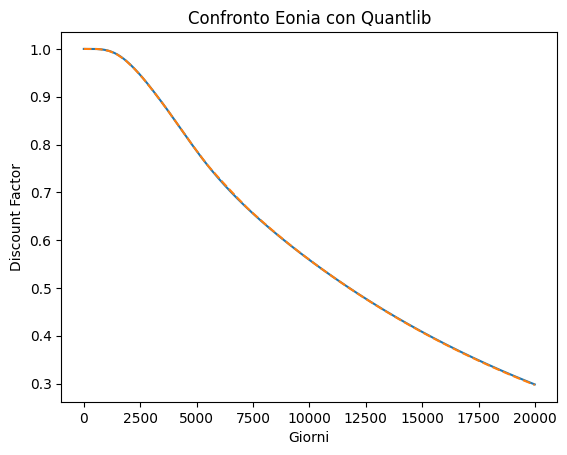

In [9]:
#Confronto tra le due curve sul discount - Sembrano differenze accettabili - Differenze nell'estrapolazione dei valori
from datetime import timedelta
days = [i for i in range(0,20000,10)]
dates = [ today + day for day in days ]
datesnew = [tq.Settings.evaluation_date + timedelta(days=day) for day in days]
rates_c = [ eonia_curve_c.discount(date) for date in dates]
Newrates_c = [disc_curve.discount(datenew, tq.InterpolationType.Linear) for datenew in datesnew]

plt.plot(days, rates_c)
plt.plot(days, Newrates_c, linestyle='dashed')
plt.xlabel('Giorni')
plt.ylabel('Discount Factor')
plt.title('Confronto Eonia con Quantlib')

plt.show()

# Forwarding 6M

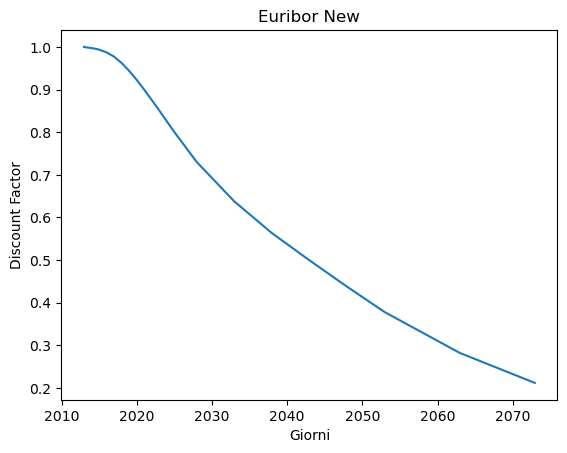

In [6]:

from utilities.helper import NewFRAHelper, NewSwapHelper

# Definizione dei nuovi helper per le nostri classi
day_counter = DayCounter(DayCounterConvention.Actual360)
fixed_day_counter = DayCounter(DayCounterConvention.Thirty360)
calendar = TARGET()
Settings.evaluation_date = date(2012,12,11)


NewEurhelpers = [NewDepositRateHelper(0.312/100.0,
6, TimeUnit.Months, calendar, BusinessDayConvention.Following, 3,day_counter)]

NewEurhelpers += [
NewFRAHelper(rate/100, calendar.advance(Settings.evaluation_date,start,TimeUnit.Months,BusinessDayConvention.Unadjusted), 6, TimeUnit.Months, calendar,BusinessDayConvention.Following,0, day_counter, 2)
for rate, start in[(0.293, 1), (0.272, 2), (0.260, 3),
(0.256, 4), (0.252, 5), (0.248, 6),
(0.254, 7), (0.261, 8), (0.267, 9),
(0.279, 10), (0.291, 11), (0.303, 12),
(0.318, 13), (0.335, 14), (0.352, 15),
(0.371, 16), (0.389, 17), (0.409, 18)]
]

NewEurhelpers += [
NewSwapHelper(rate/100, period, TimeUnit.Years, disc_curve, 1, TimeUnit.Years, BusinessDayConvention.Unadjusted,6, TimeUnit.Months, calendar,BusinessDayConvention.Following,0,fixed_day_counter,day_counter,2)
for rate, period in[(0.424, 3), (0.576, 4), (0.762, 5),
(0.954, 6), (1.135, 7), (1.303, 8),
(1.452, 9), (1.584, 10), (1.809, 12),
(2.037, 15), (2.187, 20), (2.234, 25),
(2.256, 30), (2.295, 35), (2.348, 40),
(2.421, 50), (2.463, 60)]
]

Eurcurve = NewDiscountCurve(settlement_days=2,calendar=calendar, helpers = NewEurhelpers, day_counter=day_counter ,interpolation = InterpolationType.Cubic)
EurA = Eurcurve.dfs
EurB = Eurcurve.pillars
EurC = Eurcurve.T1

# Creazione del plot
plt.plot(EurB, EurA)

plt.xlabel('Giorni')
plt.ylabel('Discount Factor')
plt.title('Euribor New')

# Visualizzazione del plot
plt.show()

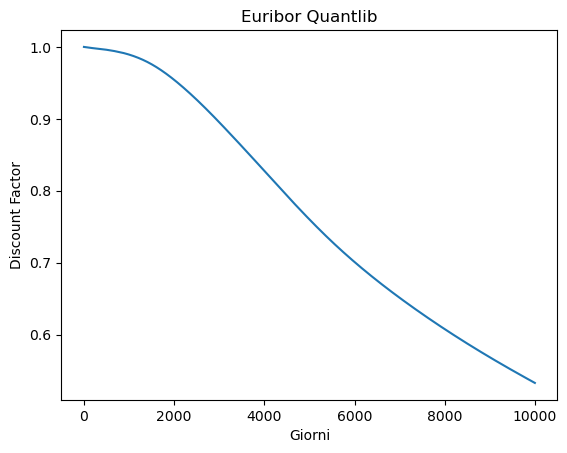

In [7]:
Eurhelpers = [
ql.DepositRateHelper(ql.QuoteHandle(ql.SimpleQuote(0.312/100)),
ql.Period(6,ql.Months), 3,
ql.TARGET(), ql.Following, False, ql.Actual360())
]

euribor6m = ql.Euribor6M()

Eurhelpers += [
ql.FraRateHelper(ql.QuoteHandle(ql.SimpleQuote(rate/100)),
start, euribor6m)
for rate, start in [(0.293, 1), (0.272, 2), (0.260, 3),
(0.256, 4), (0.252, 5), (0.248, 6),
(0.254, 7), (0.261, 8), (0.267, 9),
(0.279, 10), (0.291, 11), (0.303, 12),
(0.318, 13), (0.335, 14), (0.352, 15),
(0.371, 16), (0.389, 17), (0.409, 18)]
]

discount_curve = ql.RelinkableYieldTermStructureHandle()
discount_curve.linkTo(eonia_curve_c)

Eurhelpers += [
ql.SwapRateHelper(ql.QuoteHandle(ql.SimpleQuote(rate/100)),
ql.Period(tenor, ql.Years), ql.TARGET(),
ql.Annual, ql.Unadjusted,
ql.Thirty360(ql.Thirty360.BondBasis),
euribor6m, ql.QuoteHandle(), ql.Period(0, ql.Days),
discount_curve)
for rate, tenor in [(0.424, 3), (0.576, 4), (0.762, 5),
(0.954, 6), (1.135, 7), (1.303, 8),
(1.452, 9), (1.584, 10), (1.809, 12),
(2.037, 15), (2.187, 20), (2.234, 25),
(2.256, 30), (2.295, 35), (2.348, 40),
(2.421, 50), (2.463, 60)]
]

euribor6m_curve = ql.PiecewiseLogCubicDiscount(2, ql.TARGET(), Eurhelpers,
ql.Actual365Fixed())
euribor6m_curve.enableExtrapolation()

spot = euribor6m_curve.referenceDate()
days = [i for i in range(10000)]
dates = [ spot+day for day in days ]
rates = [ euribor6m_curve.discount(d) for d in dates ]

plt.plot(days, rates)
#plt.plot(days, rates_c)

plt.xlabel('Giorni')
plt.ylabel('Discount Factor')
plt.title('Euribor Quantlib')

plt.show()

In [8]:
# Attenzione, 13 Dicembre 2015 è festivo ma non ottengo la correzione giusta
print(today)
A = euribor6m_curve.dates()
B = Eurcurve.pillars
C = Eurcurve.dfs
Diff = 0.0
Diff1 = 0.0
for i in range(len(B)):
  print(A[i],euribor6m_curve.discount(A[i]),B[i],C[i], np.abs(euribor6m_curve.discount(A[i]) -C[i])/C[i])
  Diff = Diff + np.abs(euribor6m_curve.discount(A[i]) -C[i])/C[i]
print("Media degli errori sui singoli pillar:", Diff*100/len(B),"%")

December 11th, 2012
December 13th, 2012 1.0 2012-12-13 tf.Tensor(1.0, shape=(), dtype=float64) tf.Tensor(0.0, shape=(), dtype=float64)
June 14th, 2013 0.9984156262091015 2013-06-14 tf.Tensor(0.9984165114128991, shape=(), dtype=float64) tf.Tensor(8.86607730818922e-07, shape=(), dtype=float64)
July 15th, 2013 0.9982169981126003 2013-07-15 tf.Tensor(0.9982788224218403, shape=(), dtype=float64) tf.Tensor(6.193090332214834e-05, shape=(), dtype=float64)
August 13th, 2013 0.998050052978317 2013-08-13 tf.Tensor(0.998115559226564, shape=(), dtype=float64) tf.Tensor(6.562992395173467e-05, shape=(), dtype=float64)
September 13th, 2013 0.997834821937486 2013-09-13 tf.Tensor(0.9979121000036998, shape=(), dtype=float64) tf.Tensor(7.743975267314591e-05, shape=(), dtype=float64)
October 15th, 2013 0.9975776974908349 2013-10-15 tf.Tensor(0.9976716928828103, shape=(), dtype=float64) tf.Tensor(9.421475285502659e-05, shape=(), dtype=float64)
November 13th, 2013 0.9973657767143068 2013-11-13 tf.Tensor(0.99

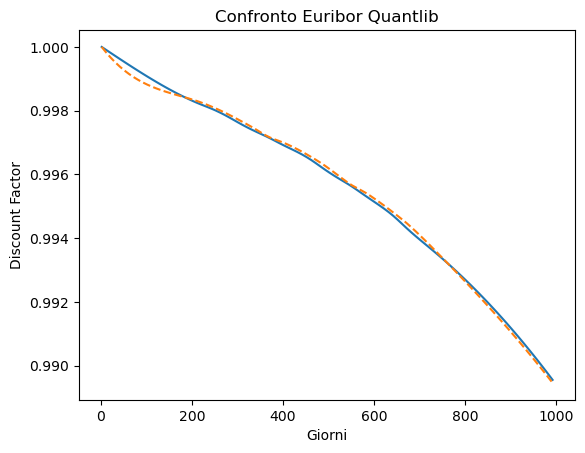

In [9]:
#Confronto tra le due curve sul discount - Euribor - Sembra esserci un errore nel bootstrap dello swap. Tutti gli altri sembrano esatti
from utilities.interpolation import InterpolationType

days = [i for i in range(2,1000,10)]
dates = [ today + day for day in days ]
datesnew = [Settings.evaluation_date + timedelta(days=day) for day in days]
rates_c = [ euribor6m_curve.discount(date) for date in dates]
Newrates_c = [Eurcurve.discount(day) for day in datesnew]

plt.plot(days, rates_c)
plt.plot(days, Newrates_c, linestyle='dashed')
plt.xlabel('Giorni')
plt.ylabel('Discount Factor')
plt.title('Confronto Euribor Quantlib')

plt.show()

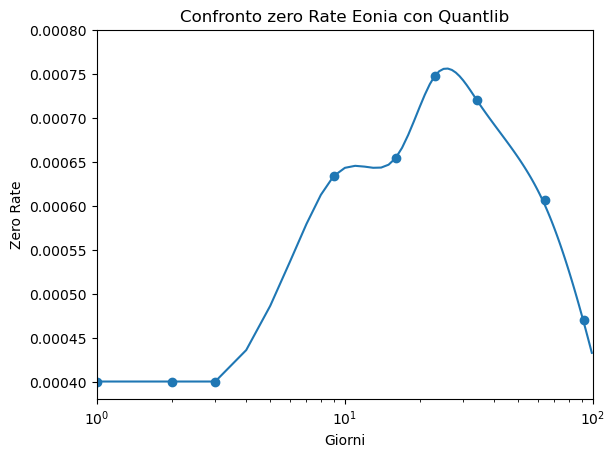

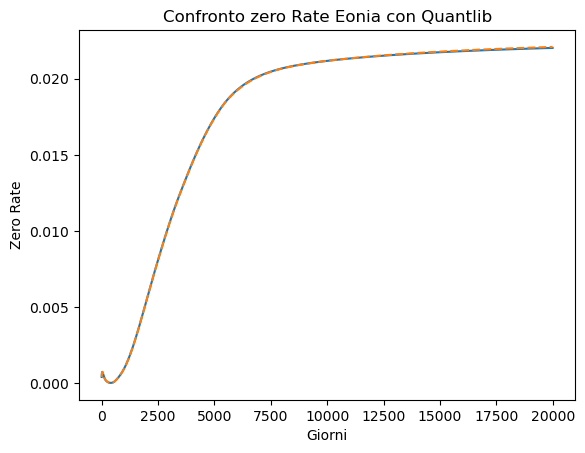

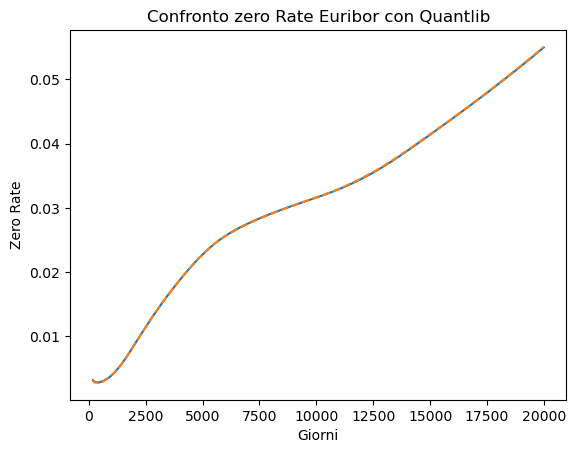

In [10]:
#Confronto tra le due curve sullo zerorate - Sicuramente problema formule
from utilities.compounding import CompoundingType
days = [i for i in range(1,100)]
dates = [ today + day for day in days ]
datesnew = disc_curve.pillars.copy()
datesnew.pop(0)
datesnew2 = [(datenew-Settings.evaluation_date).days for datenew in datesnew]
rates_c = [ eonia_curve_c.zeroRate(date, ql.Actual360(),ql.Simple).rate() for date in dates]
Newrates_c = [disc_curve.zero_rate(date, compounding=CompoundingType.Simple) for date in datesnew]

plt.plot(days, rates_c)
plt.scatter(datesnew2, Newrates_c)
plt.xlim(1,100)
plt.ylim(0.00038,0.0008)
plt.xscale('log')
plt.xlabel('Giorni')
plt.ylabel('Zero Rate')
plt.title('Confronto zero Rate Eonia con Quantlib')

plt.show()


#Confronto tra le due curve sullo zerorate - Sicuramente problema formule
from utilities.compounding import CompoundingType
days = [i for i in range(1,20000,10)]
dates = [ today + day for day in days ]
datesnew = [Settings.evaluation_date + timedelta(days=day) for day in days]
rates_c = [ eonia_curve_c.zeroRate(date, ql.Actual360(),ql.Compounded).rate() for date in dates]
Newrates_c = [disc_curve.zero_rate(date, compounding=CompoundingType.Compounded) for date in datesnew]

plt.plot(days, rates_c)
plt.plot(days, Newrates_c, linestyle='dashed')
plt.xlabel('Giorni')
plt.ylabel('Zero Rate')
plt.title('Confronto zero Rate Eonia con Quantlib')

plt.show()


days = [i for i in range(180,20000,10)]
dates = [ today + day for day in days ]
datesnew = [Settings.evaluation_date + timedelta(days=day) for day in days]
rates_c = [euribor6m_curve.zeroRate(date, ql.Actual360(),ql.Simple).rate() for date in dates]
Newrates_c = [Eurcurve.zero_rate(day,compounding=CompoundingType.Simple) for day in datesnew]

plt.plot(days, rates_c)
plt.plot(days, Newrates_c, linestyle='dashed')
plt.xlabel('Giorni')
plt.ylabel('Zero Rate')
plt.title('Confronto zero Rate Euribor con Quantlib')

plt.show()

In [11]:
from utilities.interpolation import InterpolationType
InterpolationType.Linear.value

'linear'

In [12]:
from scipy.interpolate import interp1d
import tensorflow as tf
difference_days = [1,10,100,1000]
rates = [[1,10,100,1000],[2,20,200,2000],[3,30,300,3000]]
dfs =  tf.Variable(rates, dtype=tf.float64)
print(dfs)
f = interp1d(np.log(difference_days), dfs)
print(tf.Variable(f(np.log(500))))
f = interp1d(difference_days, dfs)
print(tf.Variable(f(500), dtype=tf.float64))

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[1.e+00, 1.e+01, 1.e+02, 1.e+03],
       [2.e+00, 2.e+01, 2.e+02, 2.e+03],
       [3.e+00, 3.e+01, 3.e+02, 3.e+03]])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([ 729.0730039 , 1458.1460078 , 2187.21901171])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([ 500., 1000., 1500.])>


In [13]:
dfs = tf.math.log(dfs)
print(dfs)
dfs = tf.exp(dfs)
(6.90-4.60)/(1000-100)*(500-100)+4.60

tf.Tensor(
[[0.         2.30258509 4.60517019 6.90775528]
 [0.69314718 2.99573227 5.29831737 7.60090246]
 [1.09861229 3.40119738 5.70378247 8.00636757]], shape=(3, 4), dtype=float64)


5.622222222222222

In [14]:
difference_days = [(pillar - disc_curve.today).days + 1 for pillar in disc_curve.pillars]
dfs = tf.Variable(disc_curve.dfs)
print(np.log(difference_days))
f = interp1d(np.log(difference_days), np.log(dfs))
print(np.exp(f(np.log(5000))))
f = interp1d(difference_days, np.log(dfs))
print(np.exp(f(5000)))
f = interp1d(difference_days, dfs)
print(f(5000))

[0.         0.69314718 1.09861229 1.38629436 2.30258509 2.83321334
 3.17805383 3.55534806 4.17438727 4.53259949 4.79579055 5.00394631
 5.21493576 6.12686918 6.30991828 6.46769873 6.5998705  7.00215595
 7.28892769 7.51152465 7.69348164 7.84737184 7.98139158 8.09864284
 8.20385137 8.29903718 8.38617293 8.60904285 8.89672492 9.11986847
 9.30219003]
0.785105799889742
0.786997093713338
0.7877613277397071


In [15]:
print(disc_curve.discount(date(2041,12,12)))
print(disc_curve.discount(date(2041,12,12)))
for pillar, df in zip(disc_curve.pillars, disc_curve.dfs):
    print(pillar,df)
print((date(2024,12,12) - disc_curve.today).days)

tf.Tensor(0.53816888614638, shape=(), dtype=float64)
tf.Tensor(0.53816888614638, shape=(), dtype=float64)
2012-12-11 tf.Tensor(1.0, shape=(), dtype=float64)
2012-12-12 tf.Tensor(0.9999988888901234, shape=(), dtype=float64)
2012-12-13 tf.Tensor(0.999997777782716, shape=(), dtype=float64)
2012-12-14 tf.Tensor(0.9999966666777778, shape=(), dtype=float64)
2012-12-20 tf.Tensor(0.9999841668871112, shape=(), dtype=float64)
2012-12-27 tf.Tensor(0.9999709452290191, shape=(), dtype=float64)
2013-01-03 tf.Tensor(0.9999522799539782, shape=(), dtype=float64)
2013-01-14 tf.Tensor(0.9999320044775326, shape=(), dtype=float64)
2013-02-13 tf.Tensor(0.9998922311068317, shape=(), dtype=float64)
2013-03-13 tf.Tensor(0.9998797881583567, shape=(), dtype=float64)
2013-04-10 tf.Tensor(0.9998852319779528, shape=(), dtype=float64)
2013-05-08 tf.Tensor(0.9998953420308556, shape=(), dtype=float64)
2013-06-12 tf.Tensor(0.9999089519027011, shape=(), dtype=float64)
2014-03-13 tf.Tensor(0.9999724995473989, shape=(), d

In [16]:
from datetime import timedelta
days = [i for i in range(1,3)]
dates = [ today + day for day in days ]
datesnew = [Settings.evaluation_date + timedelta(days=day) for day in days]
rates_c = [ eonia_curve_c.discount(date) for date in dates]
Newrates_c = [disc_curve.forward_rate(Settings.evaluation_date,datenew) for datenew in datesnew]
print(Newrates_c[1])

tf.Tensor(0.0004000000000026205, shape=(), dtype=float64)


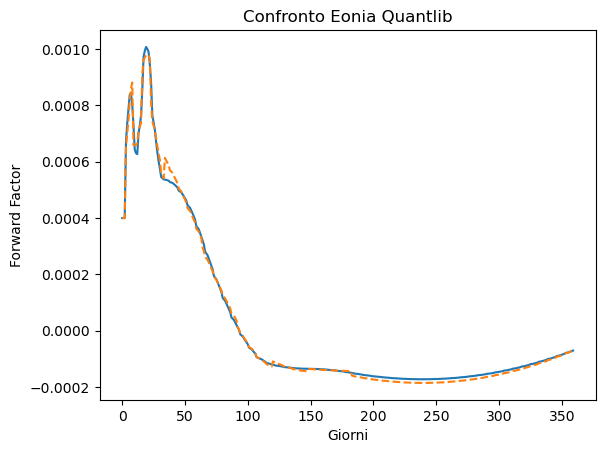

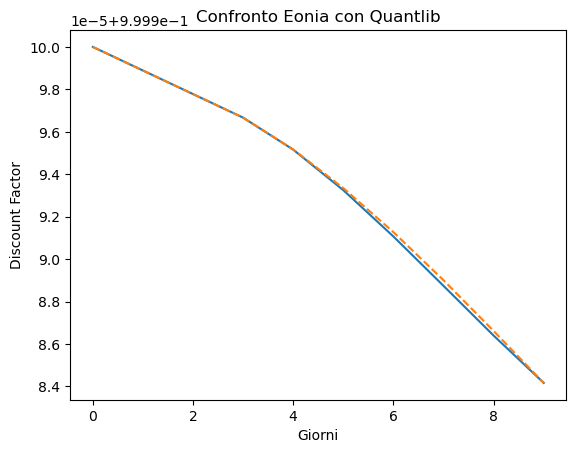

In [17]:
from datetime import timedelta
days = [i for i in range(0,360)]
dates = [ today + day for day in days ]
datesnew = [Settings.evaluation_date + timedelta(days=day) for day in days]
rates_c = [ eonia_curve_c.forwardRate(d, ql.TARGET().advance(d,1,ql.Days),ql.Actual360(), ql.Simple).rate()for d in dates ]
Newrates_c = [disc_curve.forward_rate(day,calendar.advance(day, 1, TimeUnit.Days, BusinessDayConvention.Following)) for day in datesnew]

plt.plot(days, rates_c)
plt.plot(days, Newrates_c, linestyle='dashed')
plt.xlabel('Giorni')
plt.ylabel('Forward Factor')
plt.title('Confronto Eonia Quantlib')

plt.show()

from datetime import timedelta
days = [i for i in range(0,10)]
dates = [ today + day for day in days ]
datesnew = [Settings.evaluation_date + timedelta(days=day) for day in days]
rates_c = [ eonia_curve_c.discount(date) for date in dates]
Newrates_c = [disc_curve.discount(datenew) for datenew in datesnew]

plt.plot(days, rates_c)
plt.plot(days, Newrates_c, linestyle='dashed')
plt.xlabel('Giorni')
plt.ylabel('Discount Factor')
plt.title('Confronto Eonia con Quantlib')

plt.show()

In [18]:
for date, daten in zip(dates, datesnew):
    #print(date,daten,ql.TARGET().advance(date,1,ql.Days),calendar.advance(daten, 1, TimeUnit.Days, BusinessDayConvention.Following)) #Date giuste
    print(ql.Actual360().yearFraction(date,ql.TARGET().advance(date,1,ql.Days))-disc_curve.day_counter.year_fraction(daten,calendar.advance(daten, 1, TimeUnit.Days, BusinessDayConvention.Following)))
    print(eonia_curve_c.discount(date),eonia_curve_c.discount(ql.TARGET().advance(date,1,ql.Days)),disc_curve.discount(daten),disc_curve.discount(calendar.advance(daten, 1, TimeUnit.Days, BusinessDayConvention.Following)))
    print((eonia_curve_c.discount(date)/eonia_curve_c.discount(ql.TARGET().advance(date,1,ql.Days))-1)/ql.Actual360().yearFraction(date,ql.TARGET().advance(date,1,ql.Days)),(disc_curve.discount(daten)/disc_curve.discount(calendar.advance(daten, 1, TimeUnit.Days, BusinessDayConvention.Following))-1)/disc_curve.day_counter.year_fraction(daten,calendar.advance(daten, 1, TimeUnit.Days, BusinessDayConvention.Following)))

0.0
1.0 0.9999988888901234 tf.Tensor(1.0, shape=(), dtype=float64) tf.Tensor(0.9999988888901234, shape=(), dtype=float64)
0.0004000000000026205 tf.Tensor(0.0004000000000026205, shape=(), dtype=float64)
0.0
0.9999988888901234 0.9999977777814815 tf.Tensor(0.9999988888901234, shape=(), dtype=float64) tf.Tensor(0.999997777782716, shape=(), dtype=float64)
0.0004000000000026205 tf.Tensor(0.00039999955555813926, shape=(), dtype=float64)
0.0
0.9999977777814815 0.999996666674074 tf.Tensor(0.999997777782716, shape=(), dtype=float64) tf.Tensor(0.9999966666777778, shape=(), dtype=float64)
0.0004000000000026205 tf.Tensor(0.00039999911111365805, shape=(), dtype=float64)
0.0
0.999996666674074 0.9999910669608938 tf.Tensor(0.9999966666777778, shape=(), dtype=float64) tf.Tensor(0.9999912711352207, shape=(), dtype=float64)
0.000671971584376152 tf.Tensor(0.0006474707585280015, shape=(), dtype=float64)
0.0
0.9999951588099844 0.9999910669608938 tf.Tensor(0.9999951679112958, shape=(), dtype=float64) tf.Tenso

In [19]:
for date, daten in zip(dates, datesnew):
    #print(date,daten,ql.TARGET().advance(date,1,ql.Days),calendar.advance(daten, 1, TimeUnit.Days, BusinessDayConvention.Following)) #Date giuste
    print(ql.Actual360().yearFraction(date,ql.TARGET().advance(date,1,ql.Days)),disc_curve.day_counter.year_fraction(daten,calendar.advance(daten, 1, TimeUnit.Days, BusinessDayConvention.Following)))
    print(ql.Actual360().dayCount(date,ql.TARGET().advance(date,1,ql.Days))/360,disc_curve.day_counter.day_count(daten,calendar.advance(daten, 1, TimeUnit.Days, BusinessDayConvention.Following))/360)

0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.008333333333333333 0.008333333333333333
0.008333333333333333 0.008333333333333333
0.005555555555555556 0.005555555555555556
0.005555555555555556 0.005555555555555556
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
0.002777777777777778 0.002777777777777778
